# Grove Temperature Sensor 1.2

In this notebook, the [Grove Temperature Sensor v1.2](http://www.seeedstudio.com/wiki/Grove_-_Temperature_Sensor_V1.2) functionality using [Grove I2C ADC](http://www.seeedstudio.com/wiki/Grove_-_I2C_ADC) is illustrated.

You can read a single value of temperature or can read multiple values at a desired interval for a desired duration.

### 1. Load overlay.

In [1]:
from pynq.pl import Overlay
Overlay("pmod.bit").download()

### 2. Read single temperature
This example shows on how to get a single temperature sample from the Grove TMP sensor.

The Grove ADC is assumed to be attached to the GR4 connector of the StickIt. The StickIt module is assumed to be plugged in the 1st PMOD labeled JB. The Grove TMP sensor is connected to the other connector of the Grove ADC.

Grove ADC provides a raw sample which is converted into resistance first and then converted into temperature.

In [2]:
import math
from pynq.pmods import Grove_TMP

#: Grove Stickit is connected to PMOD 1 labeled JB
#: Grove ADC is connected to GR 4. 
tmp = Grove_TMP(1, 4)
temperature = tmp.read()
print(float("{0:.2f}".format(temperature)),'degree Celsius')

26.9 degree Celsius


### 3. Start logging once every half a second for 10 seconds
During the execution, you can touch the temperature sensor to see the temperature profile.

You can vary the logging interval and the duration by changing the values 100 and 10 to the desired values. The raw samples are stored in the internal memory, and converted into the temperature readings.

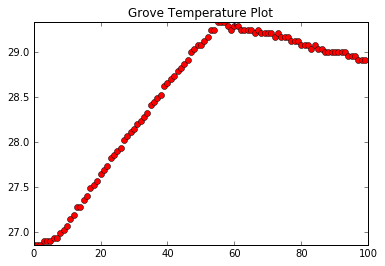

In [3]:
import time

%matplotlib inline
import matplotlib.pyplot as plt

tmp.set_log_interval_ms(100)
tmp.start_log()
time.sleep(10) # Change input during this time
tmp_log = tmp.get_log()

plt.plot(range(len(tmp_log)), tmp_log, 'ro')
plt.title('Grove Temperature Plot')
min_tmp_log = min(tmp_log)
max_tmp_log = max(tmp_log)
plt.axis([0, len(tmp_log), min_tmp_log, max_tmp_log])
plt.show()